<h1>Classifying network attacks -NSL KDD dataset</h1>

<h2> Problem </h2>
Anomaly detection and Network attacks classification with machine learning and NSL-KDD dataset <br>
*Warning!* Some cells might not be in order of execution

<h2> Analysis of the dataset </h2>
features provided, labels, categories of attacks

In [2]:
import pandas as pd
import sklearn
from scipy.io import arff
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%config IPCompleter.greedy=True

<b>Load dataset</b>

In [226]:
#dataset = arff.loadarff("NSL-KDD-Dataset-master\KDDTrain+.arff")
#train_dset=pd.DataFrame(dataset[0])
#add heders to the dataset
features = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']
train_dset=pd.read_csv("NSL-KDD-Dataset-master\KDDTrain+.txt", names=features)
test_dset=pd.read_csv("NSL-KDD-Dataset-master\KDDTest+.txt", names=features)
train_dset.head()



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,success_pred
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [227]:
train_dset[numerical_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
srv_count,125973.0,27.737888,7.263584e+01,0.0,2.00,8.00,18.00,5.110000e+02
dst_host_rerror_rate,125973.0,0.118832,3.065575e-01,0.0,0.00,0.00,0.00,1.000000e+00
srv_diff_host_rate,125973.0,0.097322,2.598305e-01,0.0,0.00,0.00,0.00,1.000000e+00
srv_rerror_rate,125973.0,0.121183,3.236472e-01,0.0,0.00,0.00,0.00,1.000000e+00
count,125973.0,84.107555,1.145086e+02,0.0,2.00,14.00,143.00,5.110000e+02
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
dst_host_same_src_port_rate,125973.0,0.148379,3.089971e-01,0.0,0.00,0.00,0.06,1.000000e+00
dst_host_srv_count,125973.0,115.653005,1.107027e+02,0.0,10.00,63.00,255.00,2.550000e+02


<h2> Data preparation and cleaning </h2>
    
1.create dictionary for attack categories
2. create functions for mapping categories to labels


In [228]:
#dictionary for attack categories
attack_map={
    "apache2":"dos",
     "back":"dos",
    "buffer_overflow" : "privilege_escalation",
    "ftp_write" : "remote_access",
    "guess_passwd" : "remote_access",
    "httptunnel":"remote_access",
    "imap" : "remote_access",
    "ipsweep": "probe",
    'land': "dos",
    "loadmodule": "privilege_escalation",
    "mailbomb":"dos",
    "mscan":"probe",
    "multihop" :"remote_access",
    "named": "remote_access",
    'neptune': "dos",
    "nmap": "probe",
    "perl" : "privilege_escalation",
    "phf" : "remote_access",
    "pod": "dos",
    "portsweep": "probe",
    "ps" : "privilege_escalation",
    "rootkit" : "privilege_escalation",
    "saint":"probe",
    "satan": "probe",
    "sendmail":"remote_access",
    "smurf": "dos",
    "snmpgetattack":"remote_access",
    "snmpguess":"remote_access",
    "spy": "remote_access",
    "sqlattack" : "privilege_escalation",
    "teardrop": "dos",
    "warezclient": "remote_access",
    "warezmaster" : "remote_access",
    "worm":"dos",
    "udpstorm":"dos",
    "normal":"benign",
    "processtable":"dos",
    "xclock":"remote_access",
    "xlock":"remote_access",
    "xsnoop":"remote_access",
    "xterm":"privilege_escalation"
}
train_dset['attack_category_gen'] = train_dset['attack_type'].map(lambda x: attack_map[x])
test_dset['attack_category_gen'] = test_dset['attack_type'].map(lambda x: attack_map[x])
#if not normal classify as attack (binary classification)
def isMalicious(x):
    if (x=="normal"):
        return 0
    else:
        return 1
train_dset["malicious"]=train_dset['attack_type'].apply(lambda row: isMalicious(row))
test_dset["malicious"]=test_dset['attack_type'].apply(lambda row: isMalicious(row))

In [172]:
test_df=pd.DataFrame(train_dset[train_dset.attack_type=="normal"])
test_df.su_attempted.value_counts()

0    67264
2       59
1       20
Name: su_attempted, dtype: int64

In [229]:
train_dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

<b>Remove unnecessary data and correct weird values</b>

In [230]:
#drop unnecessary column
train_dset.drop(columns=['success_pred'],inplace=True)
test_dset.drop(columns=['success_pred'],inplace=True)
#correct values of su_attempted columns
train_dset.su_attempted.value_counts()
#correcting 2 to be 0 as it is present only for benign samples
train_dset[train_dset.su_attempted==2].groupby(['attack_category_gen']).size()
train_dset.su_attempted.replace(2,0,inplace=True)
#num_outbound_cmd values are all 0 so I discard this useless feature
train_dset.num_outbound_cmds.value_counts()
train_dset.drop(columns=['num_outbound_cmds'],inplace=True)
test_dset.drop(columns=['num_outbound_cmds'],inplace=True)

In [231]:
#remove unnecessary columns from feature list
features.remove('success_pred')
features.remove('num_outbound_cmds')
features

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'attack_type']

In [232]:

print(np.shape(test_dset))
print(np.shape(train_dset))
categories=test_dset.attack_category_gen.unique()
categories

(22544, 43)
(125973, 43)


array(['dos', 'benign', 'probe', 'remote_access', 'privilege_escalation'],
      dtype=object)

In [115]:
sm=125973+22544
22544/sm*100
125973/sm*100

84.82059292875563

In [13]:
train_attack_types=train_dset.attack_type.value_counts()
train_attack_types

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack_type, dtype: int64

In [141]:
test_attack_types=test_dset.attack_type.value_counts()

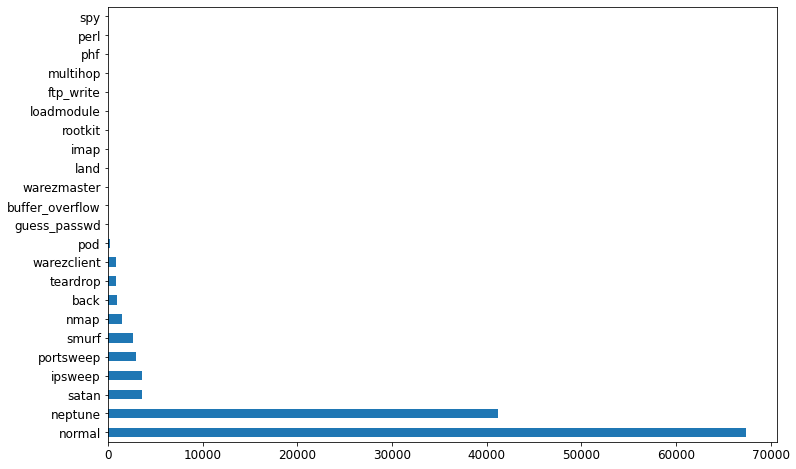

In [147]:
train_attack_types.plot(kind='barh',figsize=(12,8), fontsize=12)

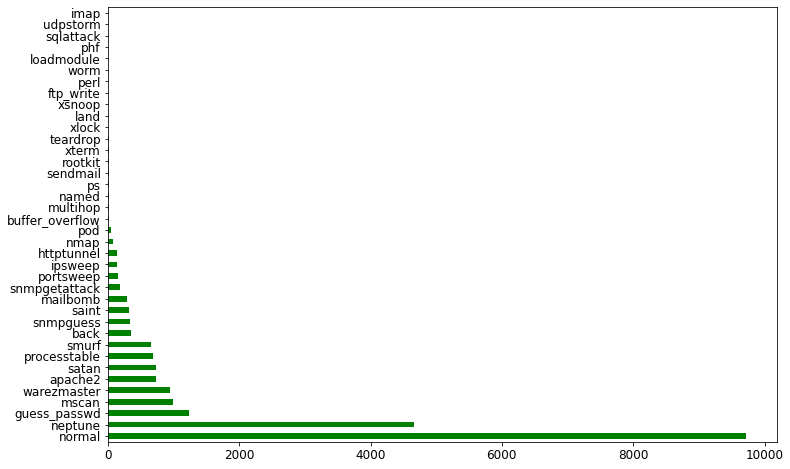

In [146]:
test_attack_types.plot(kind='barh',figsize=(12,8), fontsize=12,color='green')

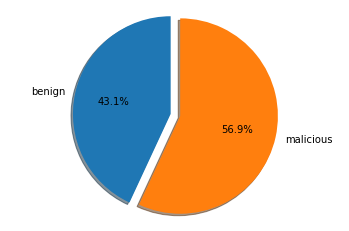

In [107]:
# Pie chart showing contents of test daatset:
malicious_test=len(test_labels_binary[test_labels_binary==1])*100/len(test_labels_binary)
benign_test = len(test_labels_binary[test_labels_binary==0])*100/len(test_labels_binary)
labels = 'benign', 'malicious'
sizes = [benign_test, malicious_test]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
 

In [154]:
len(labels_binary[labels_binary==1])

58630

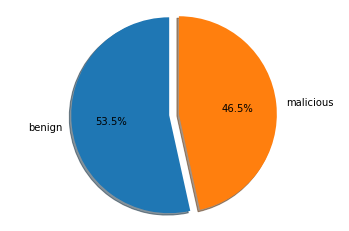

In [110]:
# Pie chart showing contents of train dataset:
malicious_train=len(labels_binary[labels_binary==1])*100/len(labels_binary)
benign_train = len(labels_binary[labels_binary==0])*100/len(labels_binary)
sizes = [benign_train, malicious_train]
explode = (0, 0.1)  # 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
 

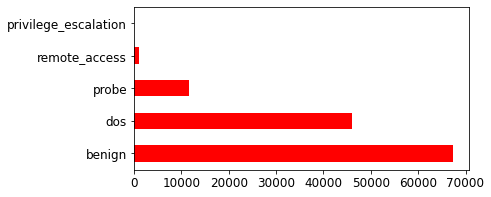

In [273]:
#train dataset attack types
labels_category.value_counts().plot(kind='barh',figsize=(6,3), fontsize=12,color='red')

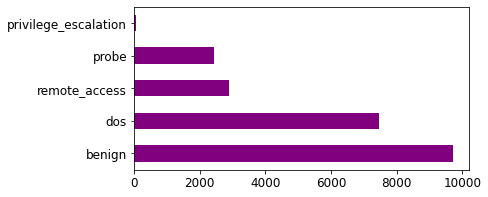

In [275]:
#test dataset attack types
test_labels_category.value_counts().plot(kind='barh',figsize=(6,3), fontsize=12,color='purple')

<h2>Feature engineering</h2>
1. categorize features
2. scaling numerical features
3. encoding nominal features

In [233]:
labels=['malicious','attack_cat_gen','attack_type','attack_category_gen']
nominal_features=['protocol_type','service','flag']
binary_features = ['land','logged_in','root_shell','su_attempted','is_host_login','is_guest_login']
 #a set of continuous(numerical)  features
numerical_features=list(set(features) - set(binary_features)-set(nominal_features)-set(labels))



In [178]:

train_dset[numerical_features].describe()

,srv_count,dst_host_rerror_rate,srv_diff_host_rate,srv_rerror_rate,count,hot,urgent,num_failed_logins,dst_host_same_src_port_rate,dst_host_srv_count,...,duration,dst_host_srv_diff_host_rate,num_compromised,num_root,dst_host_srv_serror_rate,same_srv_rate,wrong_fragment,num_shells,srv_serror_rate,diff_srv_rate
count,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,...,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05
mean,-2.935662e-16,1.151483e-15,-1.635145e-16,-1.776395e-15,6.387398e-16,-7.629865e-15,3.109539e-15,8.220883e-16,-2.412371e-16,-2.917645e-15,...,3.916911e-16,-1.443535e-15,-2.468094e-15,-2.203772e-15,-4.449642e-15,-4.595268e-15,9.708754e-16,-2.445992e-16,4.730987e-15,2.934935e-16
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-3.818776e-01,-3.876346e-01,-3.745597e-01,-3.744316e-01,-7.345115e-01,-9.507567e-02,-7.735985e-03,-2.702282e-02,-4.801968e-01,-1.044721e+00,...,-1.102492e-01,-2.891034e-01,-1.166364e-02,-1.238515e-02,-6.248708e-01,-1.503403e+00,-8.948642e-02,-1.860990e-02,-6.319290e-01,-3.496830e-01
25%,-3.543429e-01,-3.876346e-01,-3.745597e-01,-3.744316e-01,-7.170455e-01,-9.507567e-02,-7.735985e-03,-2.702282e-02,-4.801968e-01,-9.543885e-01,...,-1.102492e-01,-2.891034e-01,-1.166364e-02,-1.238515e-02,-6.248708e-01,-1.298681e+00,-8.948642e-02,-1.860990e-02,-6.319290e-01,-3.496830e-01
50%,-2.717387e-01,-3.876346e-01,-3.745597e-01,-3.744316e-01,-6.122495e-01,-9.507567e-02,-7.735985e-03,-2.702282e-02,-4.801968e-01,-4.756270e-01,...,-1.102492e-01,-2.891034e-01,-1.166364e-02,-1.238515e-02,-6.248708e-01,7.712831e-01,-8.948642e-02,-1.860990e-02,-6.319290e-01,-3.496830e-01
75%,-1.340650e-01,-3.876346e-01,-3.745597e-01,-3.744316e-01,5.143079e-01,-9.507567e-02,-7.735985e-03,-2.702282e-02,-2.860195e-01,1.258754e+00,...,-1.102492e-01,-1.114257e-01,-1.166364e-02,-1.238515e-02,1.618955e+00,7.712831e-01,-8.948642e-02,-1.860990e-02,1.605104e+00,-1.692960e-02
max,6.653245e+00,2.874410e+00,3.474118e+00,2.715365e+00,3.728053e+00,3.571955e+01,2.088191e+02,1.104972e+02,2.756092e+00,1.258754e+00,...,1.636428e+01,8.594782e+00,3.123689e+02,3.060592e+02,1.618955e+00,7.712831e-01,1.174348e+01,9.014849e+01,1.605104e+00,5.196208e+00


In [234]:
#add scaler to numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_dset[numerical_features])

train_dset[numerical_features] = scaler.transform(train_dset[numerical_features])
test_dset[numerical_features] = scaler.transform(test_dset[numerical_features])

<h2>Classification tasks</h2>

1. binary classification (benign/malicious)
2. multiclass (categories)

In [299]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

#metrics
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import mean_absolute_error,zero_one_loss,accuracy_score,confusion_matrix,f1_score


In [235]:
#split the test and train into X and Y
#labels for attack category classification -multiclass
labels_category=train_dset.attack_category_gen
# labels for determining if traffic is benign or malicious- binary classification
labels_binary=train_dset.malicious
train_dsetX=train_dset.drop(columns=['malicious','attack_category_gen'],inplace=False)

test_dsetX=test_dset.drop(columns=['malicious','attack_category_gen'],inplace=False)
train_dsetX.drop(columns=['attack_type'],inplace=True)
test_dsetX.drop(columns=['attack_type'],inplace=True)

In [236]:
test_labels_category=test_dset['attack_category_gen']
test_labels_binary = test_dset['malicious']

In [237]:
#combine test and train datasets for encoding
combined_dsetX = pd.concat([train_dsetX, test_dsetX])
#encode categorical features, e.g. service
combined_dset = pd.get_dummies(combined_dsetX, columns=nominal_features, drop_first=True)
#go back to the initial dset ivision
train_dset = combined_dset[:len(train_dsetX)]
test_dset = combined_dset[len(train_dsetX):]

# Store dummy variable feature names
encoded = list(set(train_dset)-set(combined_dset))
encoded
combined_dset.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=118)

<h3>Binary classification</h3>

In [269]:
# testing classification on the following models using cross validation on the train set
models = [    
    GaussianNB(),
     DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
]
results={}

# calculate metrics for each model in a 5-fold cross-validation
for model in models:
    modelname = model.__class__.__name__
    cv_results = cross_validate(model, train_dset, labels_binary, scoring=['accuracy','f1'])
    results[modelname] = cv_results
results

{'GaussianNB': {'fit_time': array([0.29025531, 0.28726101, 0.36698294, 0.29820108, 0.33709717]),
  'score_time': array([0.0797596 , 0.08377624, 0.07579732, 0.07579684, 0.09175467]),
  'test_accuracy': array([0.85897996, 0.85739234, 0.86009129, 0.85770422, 0.85869652]),
  'test_f1': array([0.82202074, 0.81976423, 0.82360006, 0.82007528, 0.8215002 ])},
 'DecisionTreeClassifier': {'fit_time': array([1.20218301, 1.14496255, 1.27156234, 1.25962543, 1.22175765]),
  'score_time': array([0.02792549, 0.02593064, 0.02692819, 0.02692819, 0.02692866]),
  'test_accuracy': array([0.99841238, 0.99845207, 0.99845207, 0.99805509, 0.99872986]),
  'test_f1': array([0.9982941 , 0.99833738, 0.99833696, 0.99791054, 0.99863563])},
 'RandomForestClassifier': {'fit_time': array([7.71519065, 7.86501336, 7.84241915, 7.79541802, 7.68245077]),
  'score_time': array([0.26030302, 0.28223753, 0.2632556 , 0.26429224, 0.26130629]),
  'test_accuracy': array([0.99900774, 0.99904743, 0.99896805, 0.99884893, 0.9990077 ]),


In [297]:
lst=[0.26030302, 0.28223753, 0.2632556 , 0.26429224, 0.26130629]
sum(lst) / len(lst)

0.266278936

In [325]:
#evaluate models on test set
conf_matrices={}
for model in models:
    print(model.__class__.__name__)
    classifier = model
    classifier.fit(train_dset, labels_binary)

    pred_y = classifier.predict(test_dset)

    conf = confusion_matrix(test_labels_binary, pred_y)
    error = zero_one_loss(test_labels_binary, pred_y)
    f1=f1_score(test_labels_binary, pred_y)
    conf_matrices[model.__class__.__name__]=conf
    print(conf)
    print(1-error)
    print(f1)

GaussianNB
[[9644   67]
 [9722 3111]]
0.5657824698367636
0.38860783211542066
DecisionTreeClassifier
[[9398  313]
 [3788 9045]]
0.8180890702625976
0.8151953494659997
RandomForestClassifier
[[9449  262]
 [5261 7572]]
0.7550124201561391
0.7327623748004065
KNeighborsClassifier
[[9443  268]
 [4756 8077]]
0.7771469127040455
0.7627726886391538


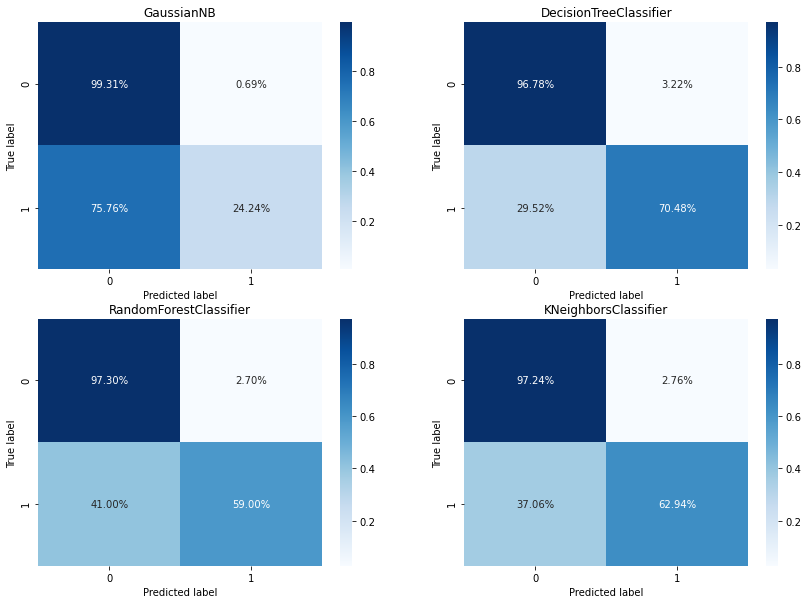

In [326]:
fig = plt.figure(figsize=(14,10))
classifiers=['GaussianNB','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier']

for cnt,name in enumerate(classifiers):
    plt.subplot(2, 2,cnt+1)
    plt.title(name)
    cm=conf_matrices[name]
    cm= cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    map = sns.heatmap(cm,annot=True,fmt='.2%', cmap='Blues')
    
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
plt.show()
#ap = sns.heatmap(conf_matrices['DecisionTreeClassifier']/np.sum(conf_matrices['DecisionTreeClassifier'], axis=0),annot=True,fmt='.2%', cmap='Blues')
 

#lt.show()

0.2424148332150461


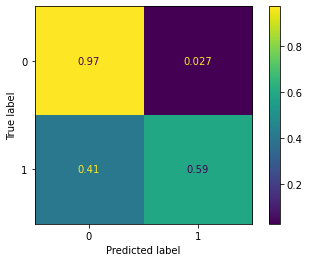

In [320]:
from sklearn.metrics import plot_confusion_matrix
#Just Random Forests 
RFclassifier = RandomForestClassifier()
RFclassifier.fit(train_dset, labels_binary)

pred_y = RFclassifier.predict(test_dset)

results = confusion_matrix(test_labels_binary, pred_y)
error = zero_one_loss(test_labels_binary, pred_y)
print(error)
plot_confusion_matrix(RFclassifier, test_dset, test_labels_binary,normalize='true')  
plt.show()

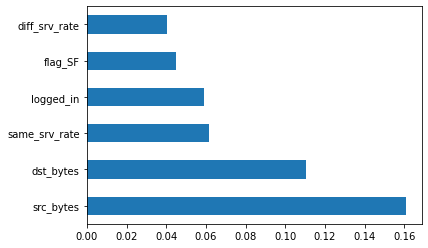

In [261]:
#checking importance of  features for random forest
feat_importances = pd.Series(RFclassifier.feature_importances_, index=test_dset.columns)
feat_importances.nlargest(6).plot(kind='barh')


In [249]:
#cheching which class was mostly misclassifed
pred=pd.DataFrame(pred_y)
pred.rename(columns={0: 'pred_y'},inplace=True)
#test_labels_binary
classified_samples=test_dset.merge(test_labels_binary, left_index=True, right_index=True)
classified_samples=classified_samples.merge(pred,left_index=True, right_index=True)
classified_samples=classified_samples.merge(test_labels_category,left_index=True, right_index=True)
misclassified_samples = classified_samples.query('malicious != pred_y')
#list(misclassified_samples.columns)
#len(test_dset)


In [253]:
misclassified_samples.attack_category_gen.value_counts()

remote_access           2801
dos                     1288
probe                    538
benign                   264
privilege_escalation      57
Name: attack_category_gen, dtype: int64

In [267]:
lst=[0.9987696 , 0.99892836, 0.99853145, 0.99865047, 0.99888862]
sum(lst) / len(lst) *100

99.87537

<b>Multiclass classification </b>

In [329]:
# testing classification on the following models using cross validation on the train set
multi_models = [    
    GaussianNB(),
     DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
]
multi_results={}

# calculate metrics for each model in a 5-fold cross-validation
for model in multi_models:
    modelname = model.__class__.__name__
    cv_results = cross_validate(model, train_dset, labels_category, scoring=['accuracy','f1_macro'])
    multi_results[modelname] = cv_results
multi_results

{'GaussianNB': {'fit_time': array([0.37100053, 0.36901855, 0.40488338, 0.38596654, 0.37499619]),
  'score_time': array([0.25332069, 0.26129317, 0.25132728, 0.28822923, 0.25631452]),
  'test_accuracy': array([0.82810081, 0.70263941, 0.7337567 , 0.68837819, 0.77133444]),
  'test_f1_macro': array([0.47011745, 0.41094974, 0.41742133, 0.4016391 , 0.43989697])},
 'DecisionTreeClassifier': {'fit_time': array([1.36437917, 1.54981589, 1.44316769, 1.38329029, 1.50796294]),
  'score_time': array([0.12865257, 0.13164735, 0.13065672, 0.13165474, 0.13263845]),
  'test_accuracy': array([0.99829331, 0.99809486, 0.9979361 , 0.99821386, 0.99781694]),
  'test_f1_macro': array([0.88775024, 0.93399037, 0.93246799, 0.89569409, 0.9218721 ])},
 'RandomForestClassifier': {'fit_time': array([8.57079744, 8.67776418, 8.36928487, 8.78448248, 8.39555597]),
  'score_time': array([0.40894151, 0.40191746, 0.39593935, 0.44580388, 0.39206791]),
  'test_accuracy': array([0.99880929, 0.99888867, 0.99869022, 0.99876955, 0.

In [346]:
m_matrices={}
for model in multi_models:
    print(model.__class__.__name__)
    mclassifier = model
    mclassifier.fit(train_dset, labels_category)

    m_pred_y = mclassifier.predict(test_dset)

    multi_conf = confusion_matrix(test_labels_category, m_pred_y)
    multi_error = zero_one_loss(test_labels_category, m_pred_y)
    m_matrices[model.__class__.__name__]=multi_conf
    f1=f1_score(test_labels_category , m_pred_y,average='macro') 
    print(multi_conf)
    print(1-multi_error)
    print(f1)

GaussianNB
[[6756   62  284   10 2599]
 [3229 3162   24    4 1041]
 [   6    0   43    0   18]
 [1382  345  134  237  323]
 [1393    3  546    6  937]]
0.4939229950319375
0.3339750688412651
DecisionTreeClassifier
[[9351   60    0  298    2]
 [1413 5950    0   97    0]
 [  48    0   10    2    7]
 [ 693  244    0 1484    0]
 [2686    4    2   16  177]]
0.7528388928317956
0.5411420177472228
RandomForestClassifier
[[9459   67    0  185    0]
 [1252 6165    0   43    0]
 [  62    0    3    0    2]
 [ 808  164    0 1449    0]
 [2794    0    2    3   86]]
0.7612668559261888
0.5046293988086643
KNeighborsClassifier
[[9444   54    1  207    5]
 [1454 5925    0   81    0]
 [  54    0    9    0    4]
 [ 612  180    0 1629    0]
 [2656    2    0   57  170]]
0.7619322214336409
0.5490557092009556


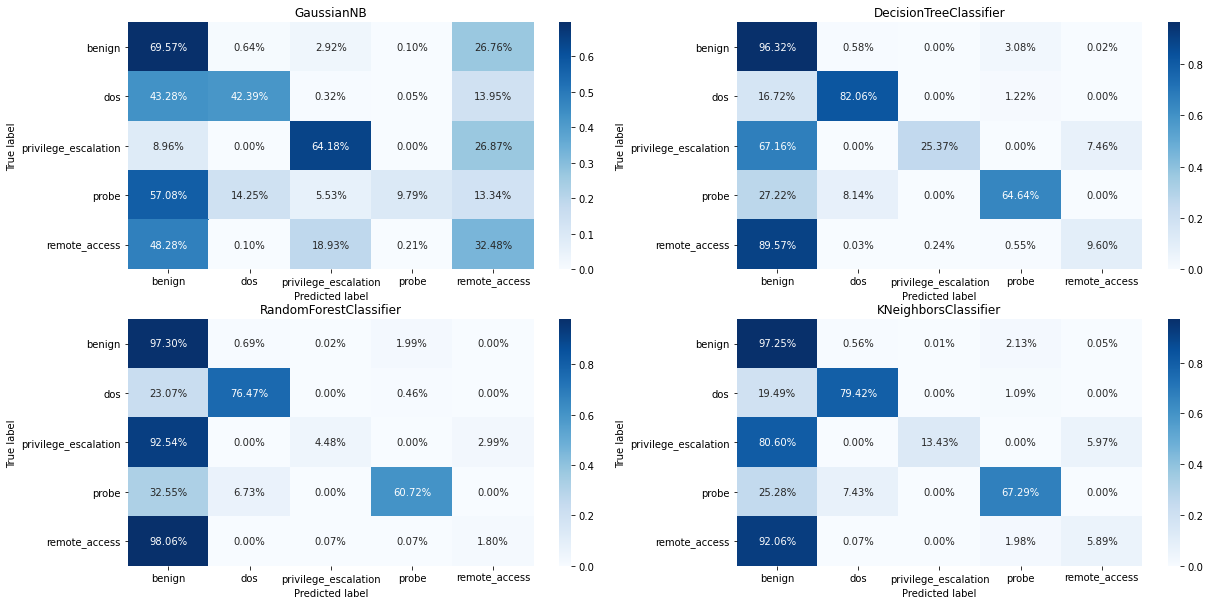

In [345]:
fig = plt.figure(figsize=(20,10))
fig.tight_layout(pad=7.0)
classifiers=['GaussianNB','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier']
classes=sorted(test_labels_category.unique())
for cnt,name in enumerate(classifiers):
    plt.subplot(2, 2,cnt+1)
    plt.title(name)
    cm=m_matrices[name]
    cm= cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    map = sns.heatmap(cm,annot=True,fmt='.2%', cmap='Blues', xticklabels=classes, yticklabels=classes)    
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
plt.show()

In [354]:
for ct, mname in enumerate(classifiers):
    print(mname)
    print(np.mean(multi_results[mname]['fit_time']))
    print(np.mean(multi_results[mname]['score_time']))
    print(np.mean(multi_results[mname]['test_accuracy']))
    print(np.mean(multi_results[mname]['test_f1_macro']))

GaussianNB
0.38117303848266604
0.2620969772338867
0.7448419107968247
0.4280049200310563
DecisionTreeClassifier
1.449723196029663
0.1310499668121338
0.9980710143345981
0.914354957469253
RandomForestClassifier
8.559576988220215
0.40893402099609377
0.9988330841615284
0.9175510556165001
KNeighborsClassifier
14.672260046005249
85.23090376853943
0.9960547132225747
0.8590268366075581


<b>Attempting undersampling to address class imbalance</b>

In [393]:
#find the mean size of category
mean_class = int(pd.Series(labels_category).value_counts().sum()/5)
mean_class
pd.Series(labels_category).value_counts()
mean_class = int(pd.Series(labels_category).value_counts().sum()/5)

benign                  67343
dos                     45927
probe                   11656
remote_access             995
privilege_escalation       52
Name: attack_category_gen, dtype: int64

<b>Over/undersampling</b>

In [403]:
#try oversampling remote access and priv esc classes with smote or trying auto strategy
from imblearn.over_sampling import SMOTE


strategy = {     
         'remote_access': mean_class,
         'privilege_escalation': mean_class}

sampler = SMOTE(sampling_strategy='auto', random_state=0)
train_dset_sampled, train_labels_sampled = sampler.fit_sample(train_dset, labels_category)
print(pd.Series(train_labels_sampled).value_counts())

probe                   67343
dos                     67343
privilege_escalation    67343
benign                  67343
remote_access           67343
Name: attack_category_gen, dtype: int64


In [406]:
from imblearn.under_sampling import RandomUnderSampler


strategy = {     'benign':mean_class,
            'dos':mean_class,
            'probe':mean_class,
         'remote_access': mean_class,
         'privilege_escalation': mean_class}

sampler = RandomUnderSampler(sampling_strategy=strategy, random_state=0)
train_dset_usampled, train_labels_usampled = sampler.fit_sample(train_dset_sampled, train_labels_sampled)
print(pd.Series(train_labels_usampled).value_counts())

benign                  25194
dos                     25194
remote_access           25194
probe                   25194
privilege_escalation    25194
Name: attack_category_gen, dtype: int64


[[9415   72   11  205    8]
 [1006 5356    2 1096    0]
 [  35    0   11    0   21]
 [ 416  162    8 1817   18]
 [2524    4   22  145  190]]
0.5490557092009556
0.7447214336408801


Text(32.09374999999999, 0.5, 'True label')

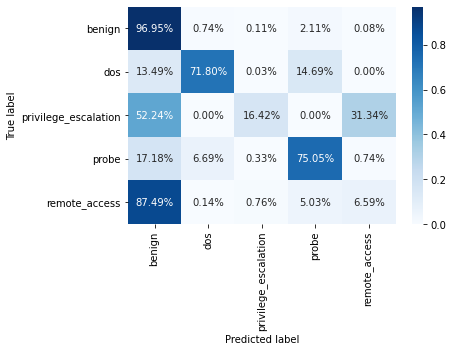

In [410]:
#try Decision Trees after resampling
DFclassifier = DecisionTreeClassifier(random_state=11)
DFclassifier.fit(train_dset_usampled, train_labels_usampled)
pred_y = DFclassifier.predict(test_dset)
error = zero_one_loss(test_labels_category, pred_y)
confm = confusion_matrix(test_labels_category, pred_y)
f1=f1_score(test_labels_category , m_pred_y,average='macro')
print(confm)
print(f1)
print(1-error)
cm= confm.astype('float') / confm.sum(axis=1)[:, np.newaxis]
matrix = sns.heatmap(cm,annot=True,fmt='.2%', cmap='Blues', xticklabels=classes, yticklabels=classes)  
plt.xlabel("Predicted label")
plt.ylabel("True label")

<b>Hyperparameter tuning <b>

In [364]:
#Attempt hyperparams tuning -n_estimators
#Just Random Forests 
estimators=[50,100,200,300,400,500]
est_errors=[]
for ct,i in enumerate(estimators):
    RFclassifier = RandomForestClassifier(n_estimators=i)
    RFclassifier.fit(train_dset, labels_category)
    pred_y = RFclassifier.predict(test_dset)
    error = zero_one_loss(test_labels_category, pred_y)
    est_errors.append(error)
    print("Estimators: {0}, error: {1}".format(i,error))


Estimators: 50, error: 0.2534599006387509
Estimators: 100, error: 0.25745209368346345
Estimators: 200, error: 0.254125266146203
Estimators: 300, error: 0.2536816891412349
Estimators: 400, error: 0.2576295244854506
Estimators: 500, error: 0.2556334279630944


In [368]:
#Attempt hyperparams tuning -
#Just Random Forests 
depth=[10,20,30,40,50,60,70]
errors=[]
for ct,i in enumerate(depth):
    
    RFclassifier = RandomForestClassifier(max_depth=i)
    RFclassifier.fit(train_dset, labels_category)
    pred_y = RFclassifier.predict(test_dset)
    error = zero_one_loss(test_labels_category, pred_y)
    errors.append(error)
    print("Max depth: {0}, error: {1}".format(i,error))


Max depth: 10, error: 0.2539478353442157
Max depth: 20, error: 0.25443577004968065
Max depth: 30, error: 0.257319020581973
Max depth: 40, error: 0.250221788502484
Max depth: 50, error: 0.24946770759403836
Max depth: 60, error: 0.25576650106458476
Max depth: 70, error: 0.2391767210787793


Text(0, 0.5, 'error')

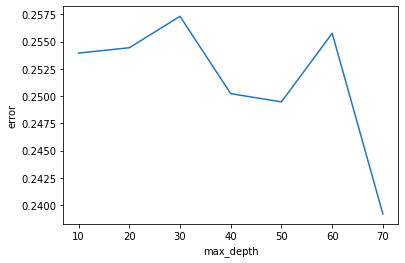

In [373]:
plt.plot(depth,errors)
plt.xlabel('max_depth')
plt.ylabel('error')

In [374]:
RFclassifier = RandomForestClassifier(max_depth=70)
RFclassifier.fit(train_dset, labels_category)
pred_y = RFclassifier.predict(test_dset)
error = zero_one_loss(test_labels_category, pred_y)
confm = confusion_matrix(test_labels_category, m_pred_y)
print(conf)
print(error)

[[9443  268]
 [4756 8077]]
0.2601579134137686
